<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare Data</a></span></li><li><span><a href="#Visualize-Data" data-toc-modified-id="Visualize-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualize Data</a></span></li><li><span><a href="#Preparing-FacilityLocation-Object" data-toc-modified-id="Preparing-FacilityLocation-Object-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preparing FacilityLocation Object</a></span></li><li><span><a href="#NaiveGreedy-Maximization" data-toc-modified-id="NaiveGreedy-Maximization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>NaiveGreedy Maximization</a></span></li><li><span><a href="#LazyGreedy-Maximization" data-toc-modified-id="LazyGreedy-Maximization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LazyGreedy Maximization</a></span></li><li><span><a href="#StochasticGreedy-Maximization" data-toc-modified-id="StochasticGreedy-Maximization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>StochasticGreedy Maximization</a></span></li><li><span><a href="#LazierThanLazyGreedy-Maximization" data-toc-modified-id="LazierThanLazyGreedy-Maximization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>LazierThanLazyGreedy Maximization</a></span></li></ul></div>

# Prepare Data

The first step in using submodlib is obviously to have some data at hand. Below we create a synthetic dataset of 500 points distributed across 10 clusters with a standard deviation of 4. In practice, each data point could correspond to images or video frames or any other dataset where subset selection is desired.

In [1]:
from sklearn.datasets import make_blobs
num_clusters = 100
cluster_std_dev = 4
points, cluster_ids, centers = make_blobs(n_samples=5000, centers=num_clusters, n_features=2, cluster_std=cluster_std_dev, center_box=(0,100), return_centers=True, random_state=4)
data = list(map(tuple, points))
xs = [x[0] for x in data]
ys = [x[1] for x in data]
import numpy as np
dataArray = np.array(data)

# Visualize Data

The visualization of the generated sample data shows the data points and the clusters.

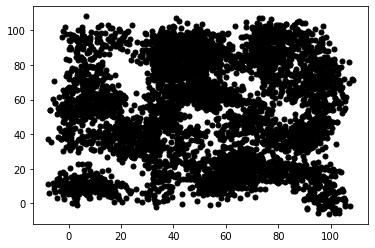

In [2]:
import matplotlib.pyplot as plt
plt.scatter(xs, ys, s=25, color='black', label="Images")

# Preparing FacilityLocation Object

In [3]:
from submodlib.functions.facilityLocation import FacilityLocationFunction
obj = FacilityLocationFunction(n=5000, mode="dense", data=dataArray, metric="euclidean")

# NaiveGreedy Maximization

5.15 s ± 140 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Greedy vector: [(2558, 36.0695915222168), (3314, 33.98683547973633), (3749, 32.73706817626953), (4061, 29.409761428833008), (207, 27.85492515563965), (2794, 27.6409969329834), (4898, 27.4133358001709), (2509, 26.272226333618164), (273, 25.87860870361328), (2031, 25.520891189575195)]


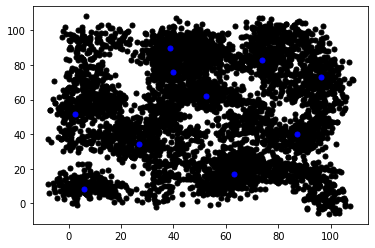

In [4]:
%timeit greedyList = obj.maximize(budget=10, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyList = obj.maximize(budget=10, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

# LazyGreedy Maximization

613 ms ± 4.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Greedy vector: [(2558, 36.0695915222168), (3314, 33.98683547973633), (3749, 32.73706817626953), (4061, 29.409761428833008), (207, 27.85492515563965), (2794, 27.6409969329834), (4898, 27.4133358001709), (2509, 26.272226333618164), (273, 25.87860870361328), (2031, 25.520891189575195)]


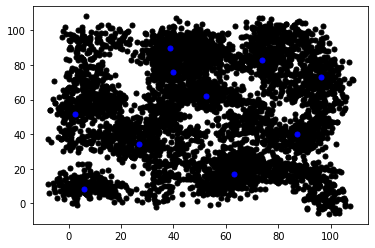

In [5]:
%timeit greedyList = obj.maximize(budget=10, optimizer='LazyGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyList = obj.maximize(budget=10, optimizer='LazyGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

# StochasticGreedy Maximization

1.61 s ± 9.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Greedy vector: [(2030, 35.50865936279297), (4501, 33.801448822021484), (2950, 32.26693344116211), (382, 29.17332649230957), (1773, 27.768905639648438), (3918, 27.574209213256836), (1489, 26.981456756591797), (1863, 26.072303771972656), (273, 25.87863540649414), (4498, 25.4644832611084)]


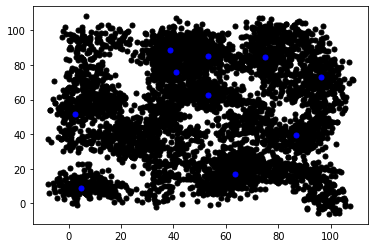

In [6]:
%timeit greedyList = obj.maximize(budget=10, optimizer='StochasticGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyList = obj.maximize(budget=10, optimizer='StochasticGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

# LazierThanLazyGreedy Maximization

587 ms ± 879 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Greedy vector: [(2030, 35.50865936279297), (4501, 33.801448822021484), (2950, 32.26693344116211), (382, 29.17332649230957), (1773, 27.768905639648438), (3918, 27.574209213256836), (1489, 26.981456756591797), (1863, 26.072303771972656), (273, 25.87863540649414), (4498, 25.4644832611084)]


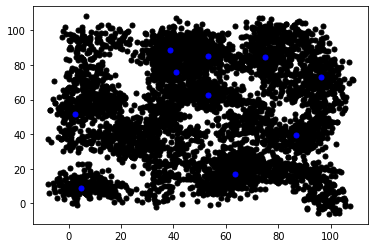

In [7]:
%timeit greedyList = obj.maximize(budget=10, optimizer='LazierThanLazyGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyList = obj.maximize(budget=10, optimizer='LazierThanLazyGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")